In [182]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
cleaned_data = pd.read_excel('clean_data_relevant.xlsx')

In [183]:
from sklearn.model_selection import train_test_split

X = cleaned_data.drop(columns='PRICE')
y = cleaned_data['PRICE']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [185]:
trained_models = []

In [186]:
from sklearn.linear_model import LinearRegression, HuberRegressor

reg = LinearRegression().fit(X_train, y_train)

print('Współczynniki: ',reg.coef_)
print('Wyraz wolny', reg.intercept_)

y_pred = reg.predict(X_test)

Współczynniki:  [-2.62662002e+01  4.24832500e+01  1.06273516e+06  4.69906579e+05
 -6.05030269e+04 -3.92187261e+05  2.54220037e+03 -2.47245377e+06
 -1.27279034e+04  9.00825889e+06  8.25126303e+06]
Wyraz wolny -556946.2474463198


In [187]:
cv_score = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 20)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = reg.score(X_test, y_test)
CV_R2 = cv_score.mean()

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Linear Model', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 2607779.3068
R2: 0.3508
Cross Validated R2:  [0.3459, 0.1563, 0.5221, 0.4182, 0.3481, 0.2682, 0.0582, 0.1891, 0.5465, 0.2921, 0.1511, 0.4439, 0.0411, 0.2398, 0.4886, 0.5675, 0.4712, 0.5468, -0.0858, 0.2289]
Mean Cross Validated R2:  0.3119
Min Cross Validated R2:  -0.0858
Max Cross Validated R2:  0.5675


Text(0.5, 1.0, 'Linear Regression for Housing dataset')

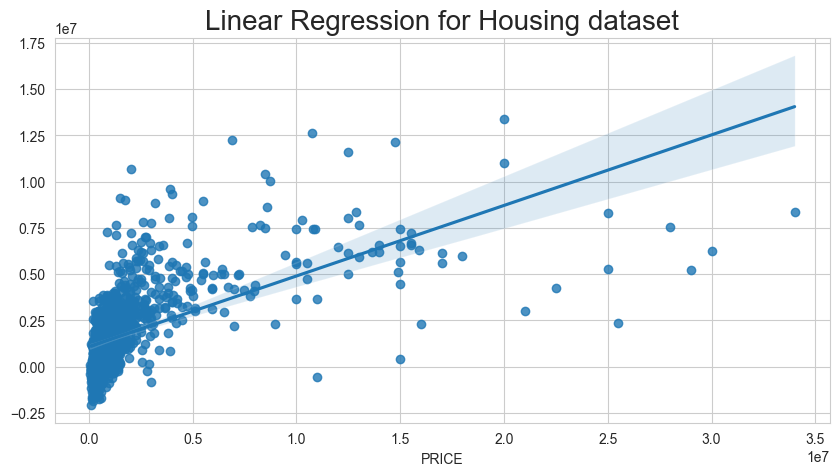

In [188]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear Regression for Housing dataset', fontsize = 20)

Text(0, 0.5, 'y_pred')

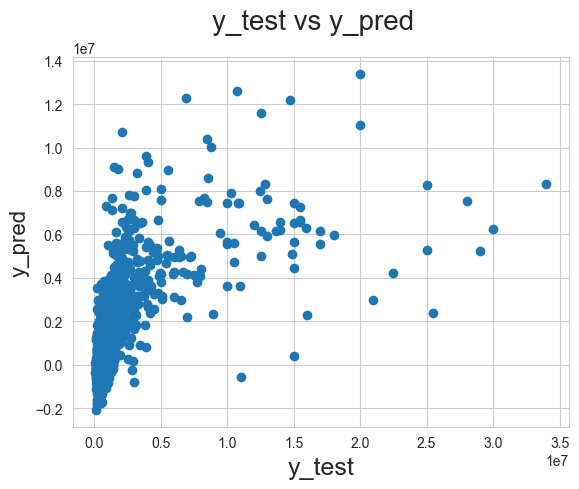

In [189]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Forest Regressor

In [190]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

cv_score = cross_val_score(estimator = forest_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = forest_reg.score(X_test, y_test)
CV_R2 = cv_score.mean()

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Forest Regressor Model = 10 trees', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 1952348.8484
R2: 0.6361
Cross Validated R2:  [0.7656, 0.1409, 0.7448, 0.4574, 0.7044, 0.3263, 0.5251, 0.2326, 0.8105, 0.4986, 0.0779, 0.3054, 0.313, 0.4512, 0.5751, 0.7607, 0.8561, 0.6219, 0.0762, 0.2642]
Mean Cross Validated R2:  0.4754
Min Cross Validated R2:  0.0762
Max Cross Validated R2:  0.8561


In [191]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 30, random_state = 0)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

cv_score = cross_val_score(estimator = forest_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = forest_reg.score(X_test, y_test)
CV_R2 = cv_score.mean()

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Forest Regressor Model = 30 trees', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 1839729.6748
R2: 0.6769
Cross Validated R2:  [0.7378, 0.1756, 0.8054, 0.4524, 0.6257, 0.4123, 0.5437, 0.3949, 0.8662, 0.4623, 0.3145, 0.308, 0.2175, 0.4374, 0.7375, 0.763, 0.8555, 0.6177, 0.4826, 0.4248]
Mean Cross Validated R2:  0.5317
Min Cross Validated R2:  0.1756
Max Cross Validated R2:  0.8662


Text(0, 0.5, 'y_pred')

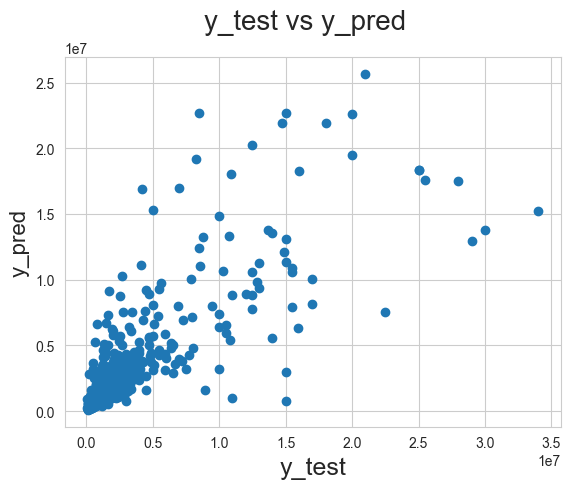

In [192]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Decision Tree

In [193]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

cv_score = cross_val_score(estimator = tree_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = tree_reg.score(X_test, y_test)
CV_R2 = cv_score.mean()

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Decision Tree', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 3450964.6662
R2: -0.137
Cross Validated R2:  [0.7902, -1.1329, -0.4323, 0.4188, -0.7729, -0.3678, 0.1557, 0.3707, 0.6583, -0.5554, 0.1426, -0.3041, -3.7446, 0.3403, 0.4285, 0.28, 0.075, -0.1611, -0.7749, 0.2459]
Mean Cross Validated R2:  -0.217
Min Cross Validated R2:  -3.7446
Max Cross Validated R2:  0.7902


Text(0, 0.5, 'y_pred')

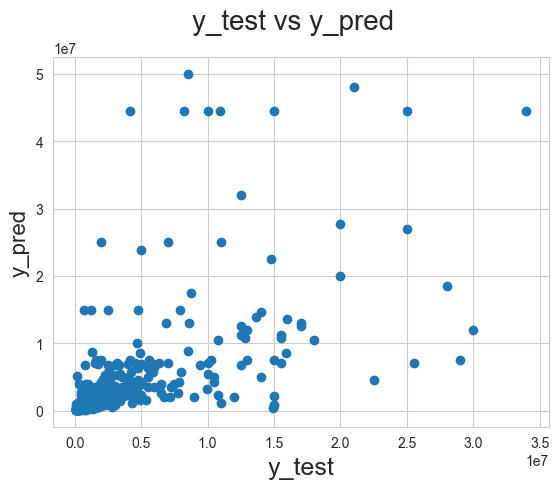

In [194]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Ridge Regression

In [195]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=3, solver="cholesky")
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

cv_score = cross_val_score(estimator = ridge_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = ridge_reg.score(X_test, y_test)
CV_R2 = cv_score.mean()

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Ridge Model', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 2604635.2362
R2: 0.3523
Cross Validated R2:  [0.3423, 0.1846, 0.5225, 0.4142, 0.3424, 0.2672, 0.0838, 0.1974, 0.5331, 0.2871, 0.1577, 0.456, 0.0784, 0.2423, 0.4833, 0.5581, 0.457, 0.5479, -0.0001, 0.229]
Mean Cross Validated R2:  0.3192
Min Cross Validated R2:  -0.0001
Max Cross Validated R2:  0.5581


Text(0, 0.5, 'y_pred')

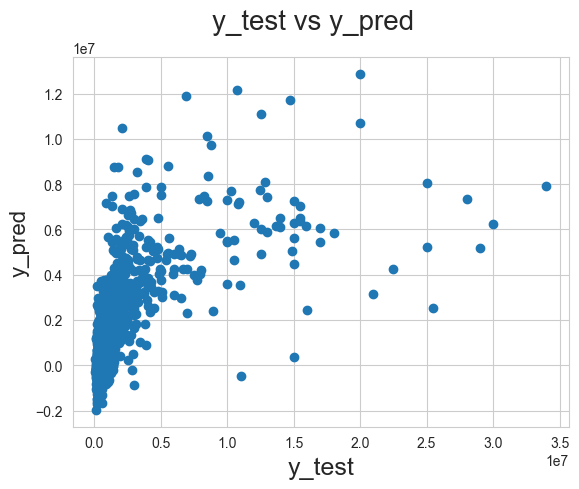

In [196]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

XGBoost

In [197]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)
XGBR.fit(X_train, y_train)
y_pred = XGBR.predict(X_test)

cv_score = cross_val_score(estimator = XGBR, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = XGBR.score(X_test, y_test)
CV_R2 = cv_score.mean()

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['XGBRegressor', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

RMSE: 1880314.408
R2: 0.6625
Cross Validated R2:  [0.785, 0.1031, 0.63, 0.7369, 0.7016, 0.4228, 0.4052, 0.4481, 0.9119, 0.6043, 0.5827, -0.0329, 0.4262, 0.6107, 0.6444, 0.7797, 0.8411, 0.6904, 0.5899, 0.4816]
Mean Cross Validated R2:  0.5681
Min Cross Validated R2:  -0.0329
Max Cross Validated R2:  0.9119


Text(0, 0.5, 'y_pred')

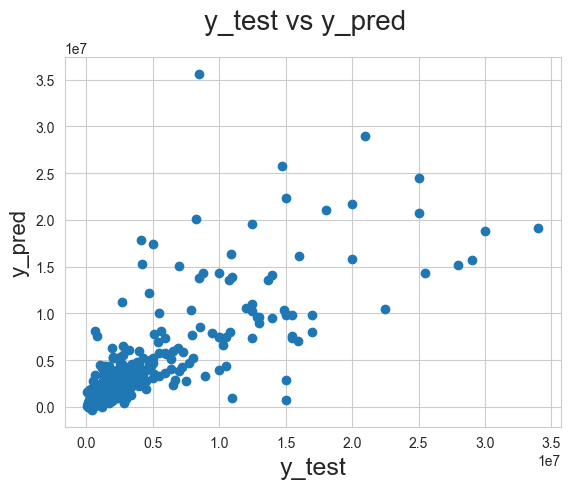

In [198]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Logistic regression

In [199]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

cv_score = cross_val_score(estimator = log_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = log_reg.score(X_test, y_test)
CV_R2 = cv_score.mean()

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Logistic Regression', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIM

RMSE: 3301277.6286
R2: 0.0067
Cross Validated R2:  [0.0, 0.019, 0.0127, 0.0, 0.0063, 0.0063, 0.0063, 0.0, 0.0, 0.0, 0.0063, 0.0, 0.0063, 0.0063, 0.0064, 0.0064, 0.0064, 0.0064, 0.0, 0.0064]
Mean Cross Validated R2:  0.0051
Min Cross Validated R2:  0.0
Max Cross Validated R2:  0.019


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'y_pred')

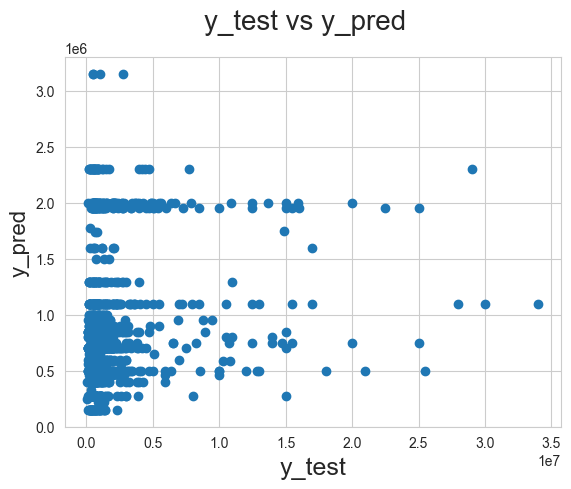

In [200]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

SVC

In [201]:
from sklearn.svm import SVC
svc_clf = SVC(probability=True)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

cv_score = cross_val_score(estimator = svc_clf, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = svc_clf.score(X_test, y_test)
CV_R2 = cv_score.mean()

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['SVC', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


RMSE: 3403702.7563
R2: 0.0111
Cross Validated R2:  [0.0063, 0.0063, 0.0063, 0.0063, 0.0063, 0.0, 0.0127, 0.0063, 0.0, 0.0063, 0.0, 0.0063, 0.0063, 0.0127, 0.0, 0.0064, 0.0127, 0.0064, 0.0064, 0.0]
Mean Cross Validated R2:  0.0057
Min Cross Validated R2:  0.0
Max Cross Validated R2:  0.0127


Text(0, 0.5, 'y_pred')

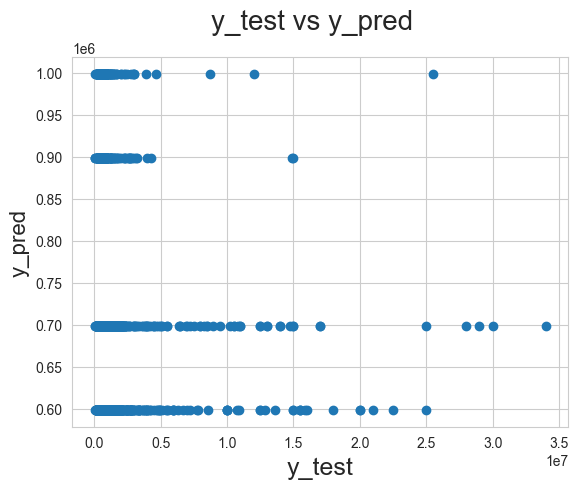

In [202]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Bayesian regression

In [203]:
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVC
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

cv_score = cross_val_score(estimator = bayesian_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = bayesian_reg.score(X_test, y_test)
CV_R2 = cv_score.mean()

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Bayesian Reg', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

RMSE: 3403702.7563
R2: 0.3512
Cross Validated R2:  [0.3452, 0.1624, 0.5224, 0.4175, 0.347, 0.2681, 0.0643, 0.1911, 0.5436, 0.2911, 0.1525, 0.4468, 0.049, 0.2404, 0.4876, 0.5656, 0.468, 0.5475, -0.067, 0.229]
Mean Cross Validated R2:  0.3136
Min Cross Validated R2:  -0.067
Max Cross Validated R2:  0.5656


Text(0, 0.5, 'y_pred')

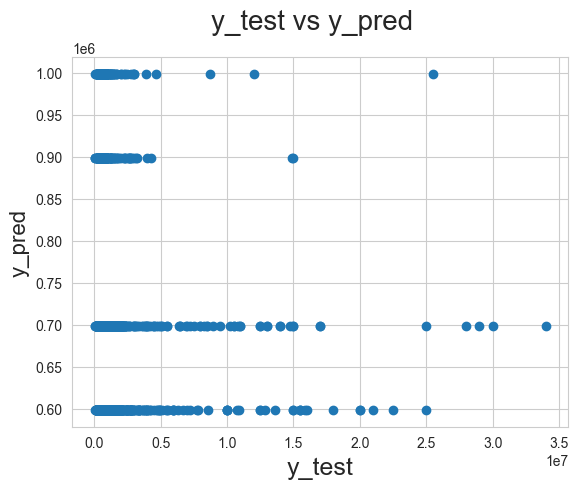

In [204]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Summary

In [205]:
trained_models = pd.DataFrame( trained_models, columns=['Model','RMSE','R2 Score','Mean Cross Validated R2 Score','Min Cross Validated R2 Score','Max Cross Validated R2 Score','Cross Validated R2 Scores'])
trained_models

,Model,RMSE,R2 Score,Mean Cross Validated R2 Score,Min Cross Validated R2 Score,Max Cross Validated R2 Score,Cross Validated R2 Scores
0,Linear Model,2607779.31,0.3508,0.3119,-0.0858,0.5675,"[0.3459, 0.1563, 0.5221, 0.4182, 0.3481, 0.268..."
1,Forest Regressor Model = 10 trees,1952348.85,0.6361,0.4754,0.0762,0.8561,"[0.7656, 0.1409, 0.7448, 0.4574, 0.7044, 0.326..."
2,Forest Regressor Model = 30 trees,1839729.67,0.6769,0.5317,0.1756,0.8662,"[0.7378, 0.1756, 0.8054, 0.4524, 0.6257, 0.412..."
3,Decision Tree,3450964.67,-0.1370,-0.2170,-3.7446,0.7902,"[0.7902, -1.1329, -0.4323, 0.4188, -0.7729, -0..."
4,Ridge Model,2604635.24,0.3523,0.3192,-0.0001,0.5581,"[0.3423, 0.1846, 0.5225, 0.4142, 0.3424, 0.267..."
5,XGBRegressor,1880314.41,0.6625,0.5681,-0.0329,0.9119,"[0.785, 0.1031, 0.63, 0.7369, 0.7016, 0.4228, ..."
6,Logistic Regression,3301277.63,0.0067,0.0051,0.0000,0.0190,"[0.0, 0.019, 0.0127, 0.0, 0.0063, 0.0063, 0.00..."
7,SVC,3403702.76,0.0111,0.0057,0.0000,0.0127,"[0.0063, 0.0063, 0.0063, 0.0063, 0.0063, 0.0, ..."
8,Bayesian Reg,3403702.76,0.3512,0.3136,-0.0670,0.5656,"[0.3452, 0.1624, 0.5224, 0.4175, 0.347, 0.2681..."


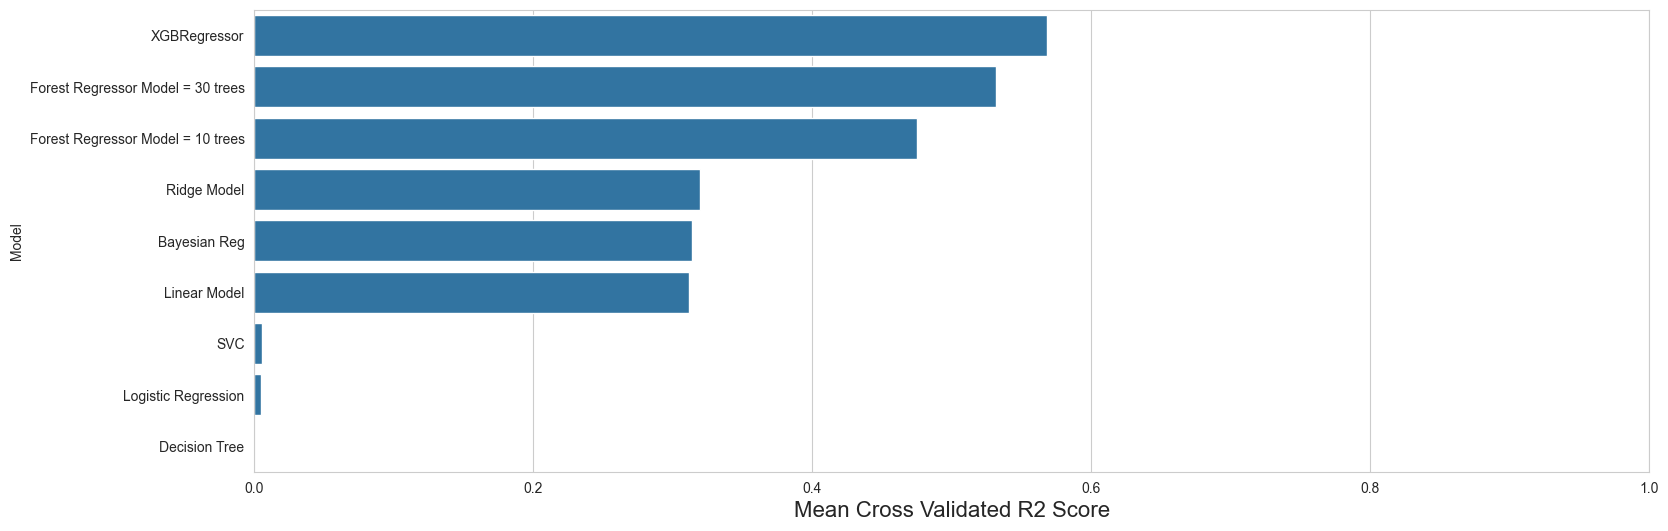

In [206]:
f, axe = plt.subplots(1,1, figsize=(18,6))

trained_models.sort_values(by=['Mean Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Mean Cross Validated R2 Score', y='Model', data = trained_models, ax = axe)
axe.set_xlabel('Mean Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)


plt.show()